In [1]:
from networks import *

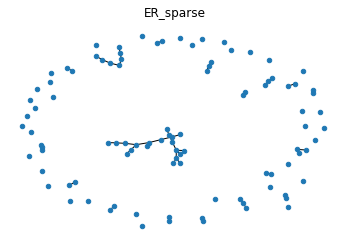

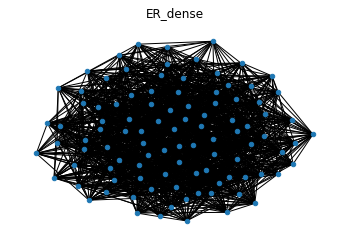

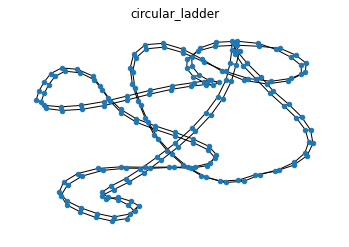

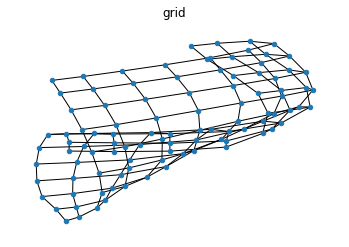

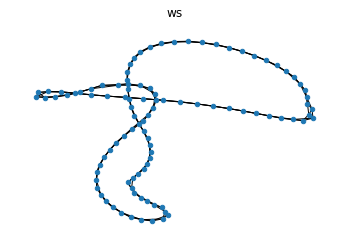

In [2]:
networks = create_networks()
# networks = create_network_dict()

draw_networks(networks)

## Demo 

In [3]:
N, T = 500, 500

network_params ={"ER_sparse" : {"n":N, "p":0.01},
                "ER_dense":  {"n":N, "p":0.3},
                "circular_ladder":  {"n":N},
                 "ws" : {"n":N, "k": 4, "p":0.0}}

networks = create_networks(network_params)

In [4]:
from simulation import Simulation 

ER_sparse_sim = Simulation(networks["ER_sparse"])
ER_dense_sim = Simulation(networks["ER_dense"])
circular_ladder_sim = Simulation(networks["circular_ladder"])
ws_sim = Simulation(networks["ws"])

In [5]:
phi_hist, spin_hist = ER_sparse_sim.run(T, 0.6, 0.5)

In [6]:
from simulation import plot_regimes

array([<AxesSubplot:title={'center':'$p_{\\mathcal{O}} = $0.5'}>,
       <AxesSubplot:title={'center':'$p_{\\mathcal{O}} = $0.67'}>,
       <AxesSubplot:title={'center':'$p_{\\mathcal{O}} = $0.83'}>,
       <AxesSubplot:title={'center':'$p_{\\mathcal{O}} = $1.0'}>],
      dtype=object)

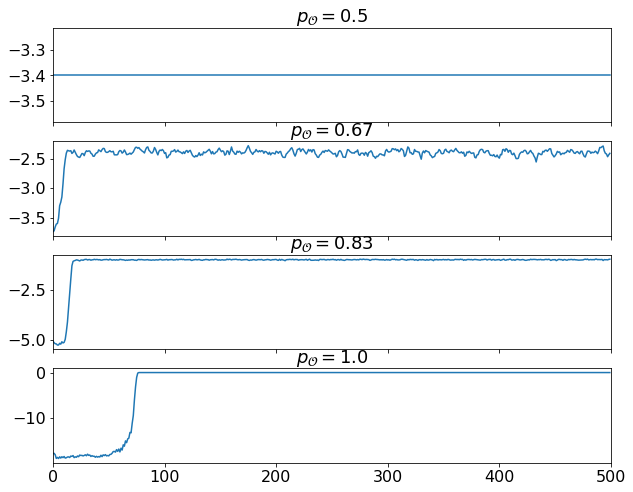

In [8]:
import numpy as np

ps = 0.5

po_vec = np.linspace(0.5, 0.999, 4)

data_vec = []
for po in po_vec:

    # phi_hist, spin_hist, kld_hist, accur_hist, negH_hist, energy_hist = ER_sparse_sim.run(T, po, ps)
    phi_hist, spin_hist = ER_sparse_sim.run(T, po, ps)

    _, _, neg_accur_hist = ER_sparse_sim.compute_VFE(phi_hist, spin_hist, decomposition = "complexity_accuracy")
    accur_hist = -neg_accur_hist

    data_vec.append(ER_sparse_sim.get_regime_data(T, accur_hist))

plot_regimes(data_vec, po_vec = po_vec )

array([<AxesSubplot:title={'center':'$p_{\\mathcal{O}} = $0.5'}>,
       <AxesSubplot:title={'center':'$p_{\\mathcal{O}} = $0.67'}>,
       <AxesSubplot:title={'center':'$p_{\\mathcal{O}} = $0.83'}>,
       <AxesSubplot:title={'center':'$p_{\\mathcal{O}} = $1.0'}>],
      dtype=object)

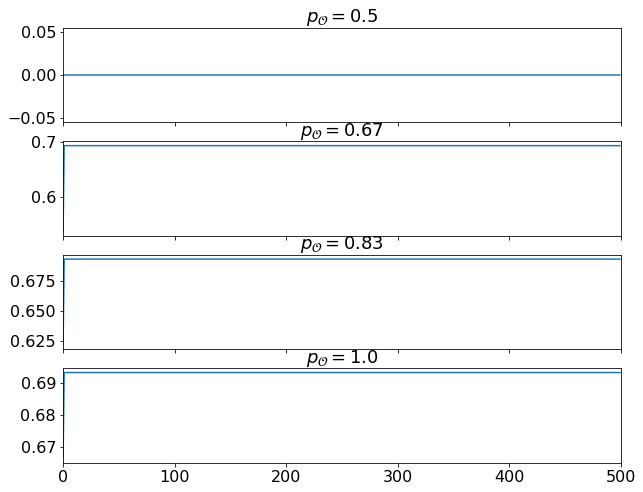

In [9]:
data_vec = []

for po in po_vec:
    # phi_hist, spin_hist, kld_hist, accur_hist, negH_hist, energy_hist = ER_dense_sim.run(T, po, ps)

    phi_hist, spin_hist = ER_dense_sim.run(T, po, ps)

    _, complexity_hist, _ = ER_dense_sim.compute_VFE(phi_hist, spin_hist, decomposition = "complexity_accuracy")

    data_vec.append(ER_dense_sim.get_regime_data(T, complexity_hist))

plot_regimes(data_vec, po_vec = po_vec )

array([<AxesSubplot:title={'center':'$p_{\\mathcal{O}} = $0.5'}>,
       <AxesSubplot:title={'center':'$p_{\\mathcal{O}} = $0.67'}>,
       <AxesSubplot:title={'center':'$p_{\\mathcal{O}} = $0.83'}>,
       <AxesSubplot:title={'center':'$p_{\\mathcal{O}} = $1.0'}>],
      dtype=object)

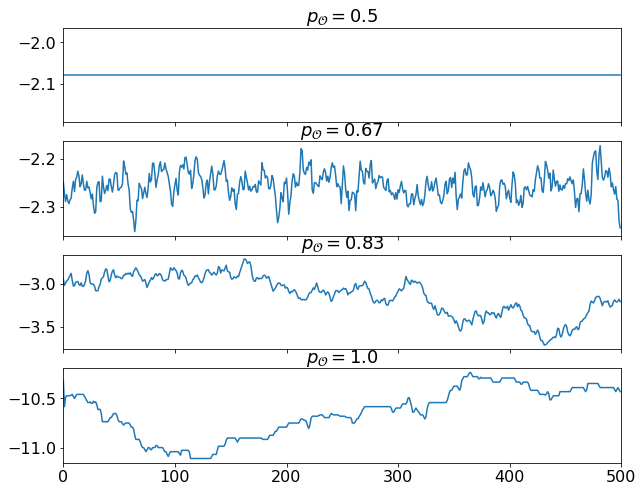

In [10]:
data_vec = []

for po in po_vec:
    # phi_hist, spin_hist, kld_hist, accur_hist, negH_hist, energy_hist = circular_ladder_sim.run(T, po, ps)

    phi_hist, spin_hist = circular_ladder_sim.run(T, po, ps)
    _, _, neg_accur_hist = circular_ladder_sim.compute_VFE(phi_hist, spin_hist, decomposition = "complexity_accuracy")
    accur_hist = -neg_accur_hist

    data_vec.append(circular_ladder_sim.get_regime_data(T, accur_hist))

plot_regimes(data_vec, po_vec = po_vec )

array([<AxesSubplot:title={'center':'$p_{\\mathcal{O}} = $0.5'}>,
       <AxesSubplot:title={'center':'$p_{\\mathcal{O}} = $0.67'}>,
       <AxesSubplot:title={'center':'$p_{\\mathcal{O}} = $0.83'}>,
       <AxesSubplot:title={'center':'$p_{\\mathcal{O}} = $1.0'}>],
      dtype=object)

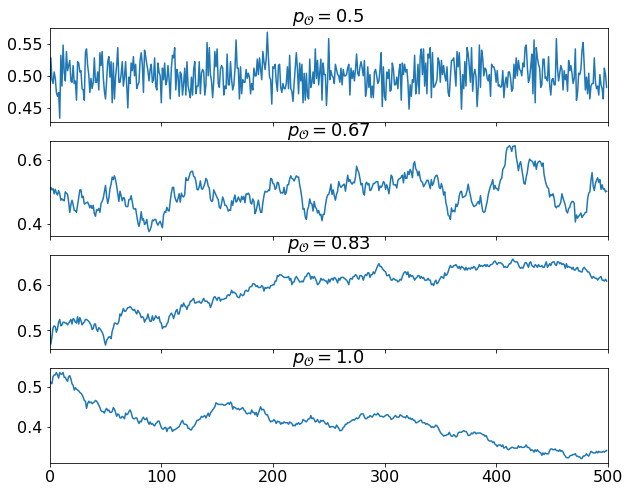

In [11]:
data_vec = []

for po in po_vec:
    # phi_hist, spin_hist, kld_hist, accur_hist, negH_hist, energy_hist = ws_sim.run(T, po, ps)
    phi_hist, spin_hist = ws_sim.run(T, po, ps)

    data_vec.append(ws_sim.get_regime_data(T, spin_hist))

plot_regimes(data_vec, po_vec = po_vec )